
## Modelo logístico

Como se puede observar del ejemplo anterior, el modelo exponencial con $\kappa>1$ describe una población que crece ilimitadamente. Para tener un modelo un poco más realista del comportamiento de una población, se debe incluir un elemento que describa un factor que limite el crecimiento.

Según el [modelo logístico](https://en.wikipedia.org/wiki/Logistic_function#In_ecology:_modeling_population_growth), la tasa de crecimiento $\kappa$ se modifica para tener en cuenta un factor relacionado con la "capacidad de carga del medio", es decir, con la máxima población que se puede sostener con los recursos que tienen disponibles. En términos de una ecuación de diferencia, este modelo se expresa como

$$ P_{n+1} = \left(\kappa  - \beta\, P_n \right) P_{n}, $$

donde el término $-\beta\,P_n$ representa una disminución en la tasa de crecimiento a medida que la población aumenta, es decir, si la población es excesiva, los recursos escasean y se tiene menos descendencia.

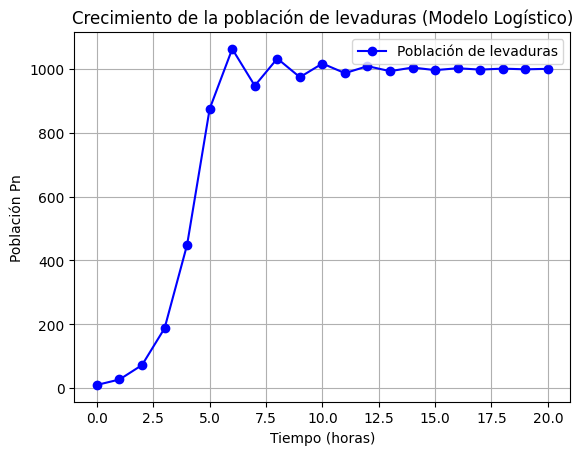

Capacidad de carga (población máxima): 418.60 individuos


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, Eq, solve

# Parámetros del modelo logístico
kappa = 1.72
beta = 1e-3
P0 = 10  # Población inicial
horas = 20  # Duración en horas

# Inicialización
P = [P0]  # Lista para almacenar la población en cada hora
n = 0

# Calcular la población durante 20 horas
while n < horas:
    Pn = P[n] + kappa * P[n] * (1 - beta * P[n])
    P.append(Pn)
    n += 1

# Graficar la población en función del tiempo
tiempo = np.arange(horas+1)
plt.plot(tiempo, P, marker='o', linestyle='-', color='b', label="Población de levaduras")
plt.xlabel("Tiempo (horas)")
plt.ylabel("Población Pn")
plt.title("Crecimiento de la población de levaduras (Modelo Logístico)")
plt.grid(True)
plt.legend()
plt.show()

# Determinación de la capacidad de carga (punto de equilibrio)
# Resolver P_n+1 = P_n => P_n = kappa * P_n * (1 - beta * P_n)
Pn = symbols('Pn')
equilibrio = Eq(Pn, kappa * Pn * (1 - beta * Pn))
capacidad_carga = solve(equilibrio, Pn)

print(f"Capacidad de carga (población máxima): {capacidad_carga[1]:.2f} individuos")


## punto 3 y 4


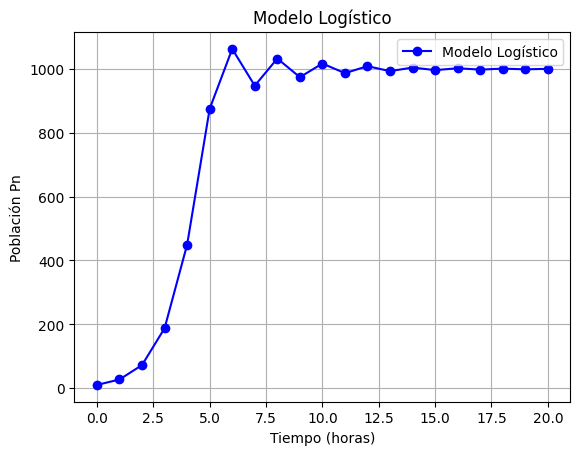

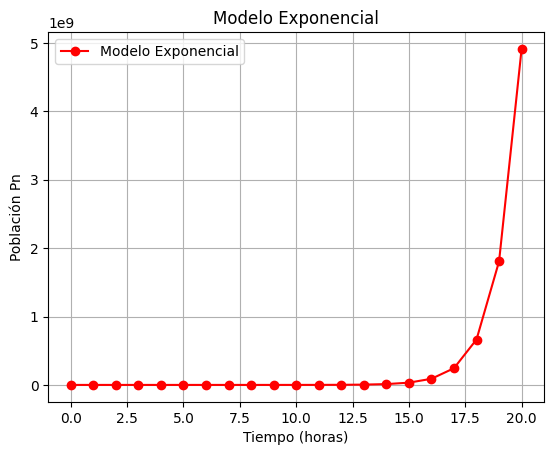

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, Eq, solve

# Parámetros
kappa = 1.72
beta = 1e-3
P0 = 10
horas = 20

# Modelo logístico
P_logistico = [P0]
n = 0
while n < horas:
    Pn = P_logistico[n] + kappa * P_logistico[n] * (1 - beta * P_logistico[n])
    P_logistico.append(Pn)
    n += 1

# Modelo exponencial
P_exponencial = [P0]
for n in range(horas):
    Pn = P_exponencial[n] + kappa * P_exponencial[n]
    P_exponencial.append(Pn)

# Graficar la comparación de los dos modelos (Graficas separadas)
plt.figure(1)
plt.plot(range(horas+1), P_logistico, marker='o', linestyle='-', color='b', label="Modelo Logístico")
plt.xlabel("Tiempo (horas)")
plt.ylabel("Población Pn")
plt.title("Modelo Logístico")
plt.grid(True)
plt.legend()

plt.figure(2)
plt.plot(range(horas+1), P_exponencial, marker='o', linestyle='-', color='r', label="Modelo Exponencial")
plt.xlabel("Tiempo (horas)")
plt.ylabel("Población Pn")
plt.title("Modelo Exponencial")
plt.grid(True)
plt.legend()


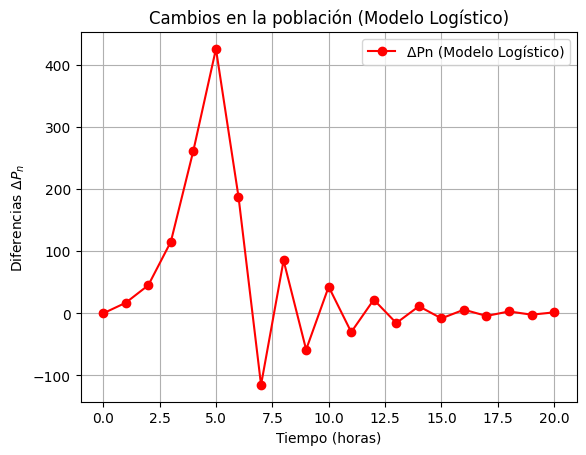

El mayor cambio en la población ocurre en la hora 5, con un incremento de 425.64 individuos.


In [11]:
# Cálculo de las diferencias ΔPn para el modelo logístico
Delta_P = [0]  # ΔP0 = 0
for n in range(horas):
    delta = P_logistico[n+1] - P_logistico[n]
    Delta_P.append(delta)

# Graficar las diferencias ΔPn
plt.plot(tiempo, Delta_P, label="ΔPn (Modelo Logístico)", marker='o', color='r')
plt.xlabel("Tiempo (horas)")
plt.ylabel("Diferencias $\Delta P_n$")
plt.title("Cambios en la población (Modelo Logístico)")
plt.grid(True)
plt.legend()
plt.show()

# Identificar el mayor cambio en la población
mayor_cambio = max(Delta_P)
momento_mayor_cambio = Delta_P.index(mayor_cambio)

print(f"El mayor cambio en la población ocurre en la hora {momento_mayor_cambio}, con un incremento de {mayor_cambio:.2f} individuos.")